In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# https://towardsdatascience.com/mnist-cnn-python-c61a5bce7a19

# session_config.gpu_options.allow_growth = True

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

# Predict a whole dataset
predictions = model.predict(test_X)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.4604 - accuracy: 0.8339
Epoch 2/5
938/938 [==============================] - 28s 29ms/step - loss: 0.3134 - accuracy: 0.8857
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.2727 - accuracy: 0.9015
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.2486 - accuracy: 0.9095
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2785 - accuracy: 0.8979
Test loss 0.2784922420978546
Test accuracy 0.8978999853134155
313/313 [==============================] - 2s 5ms/step


In [2]:
import tensorflow as tf

path_model = 'saved_model/tfmodel'
path_tflite = 'saved_model/fashion.tflite'

model.save(path_model) 
converter = tf.lite.TFLiteConverter.from_saved_model(path_model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open(path_tflite, 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: saved_model/tfmodel/assets


INFO:tensorflow:Assets written to: saved_model/tfmodel/assets


In [ ]:
print(type(test_X[0].reshape(28, 28)))

In [ ]:
from PIL import Image

I = test_X[0].reshape(28, 28)
I8 = (255.9-(((I - I.min()) / (I.max() - I.min())) * 255.9)).astype(np.uint8)

img = Image.fromarray(I8)
img.save("saved_model/shooe_invert.png")

Coat


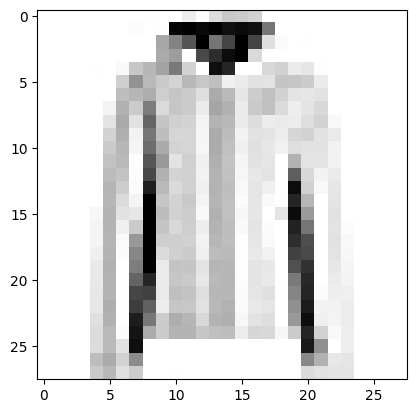

In [3]:
labels = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
indice = 6
predictionId = np.argmax(np.round(predictions[indice]))
print(labels[predictionId])
plt.imshow(test_X[indice].reshape(28, 28), cmap=plt.cm.binary)
plt.show()